In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
import glob
import os
import re
import time
import sys

from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons

from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

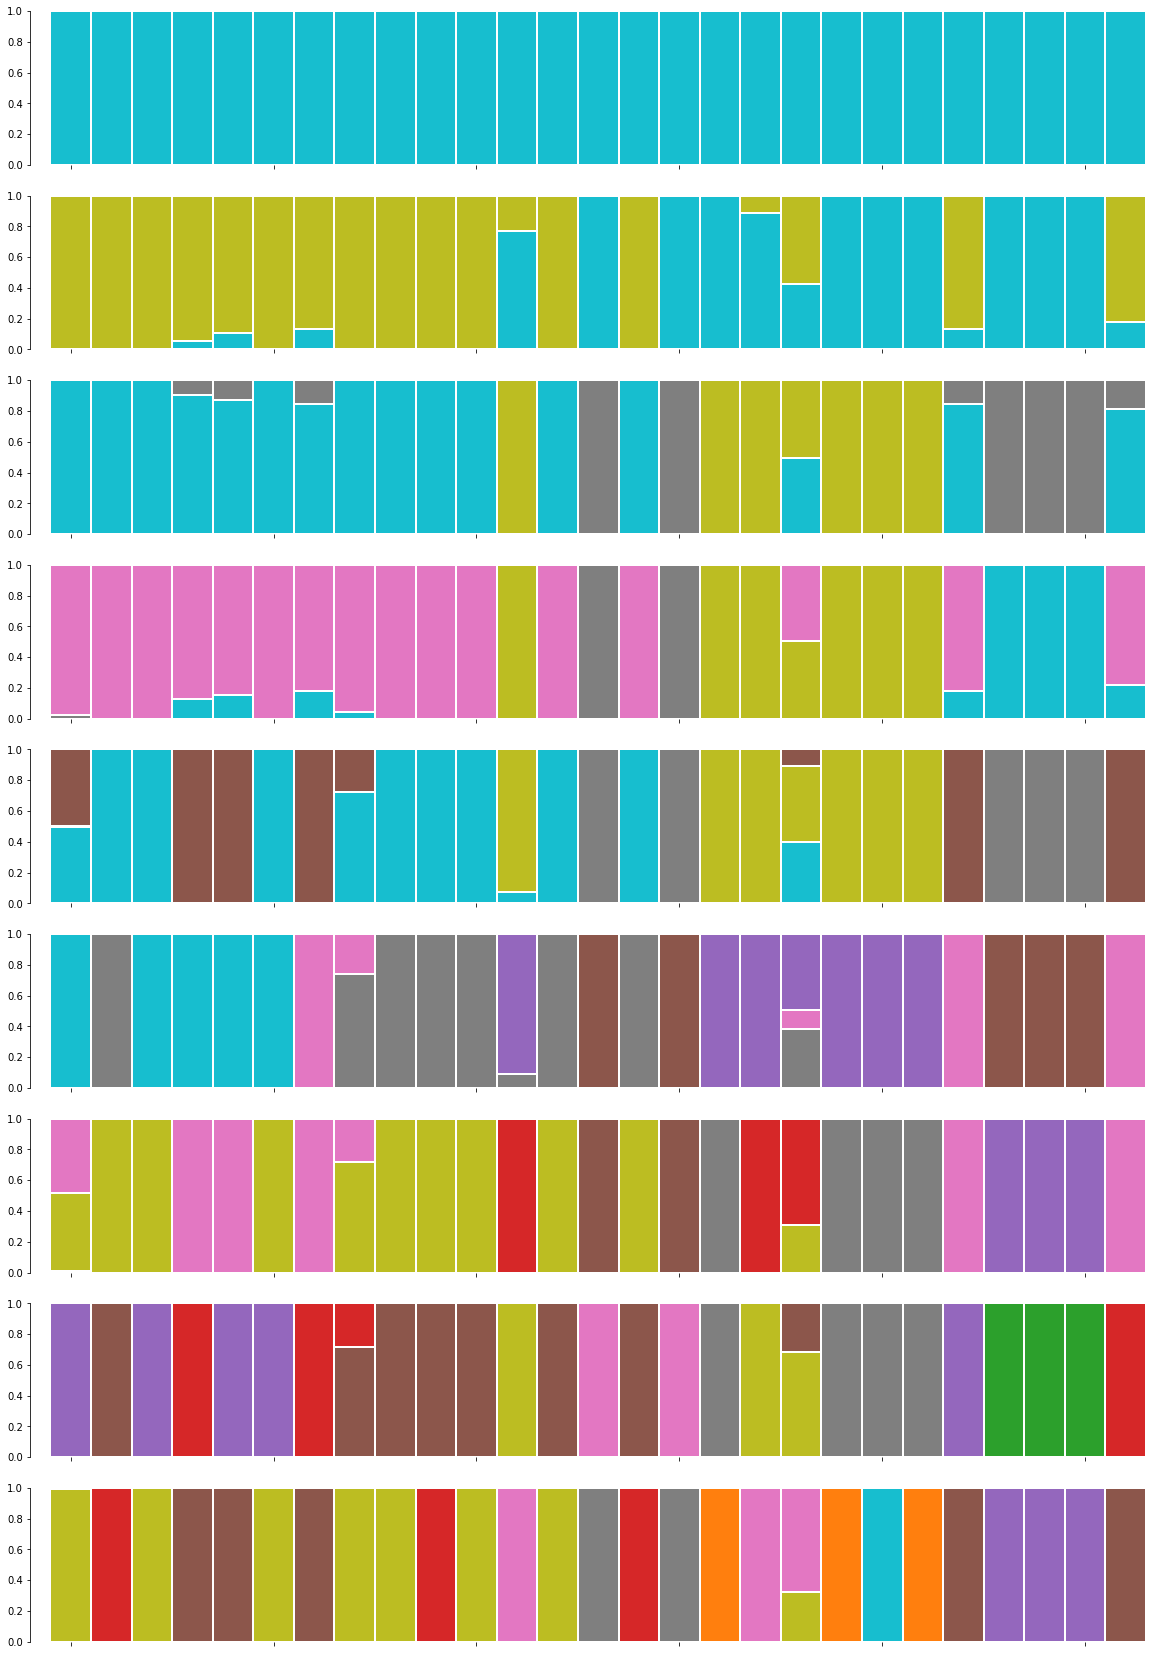

In [13]:
path='./'
extension='*qopt'

max_k=9
fig,ax=plt.subplots(figsize=(20,30),facecolor='w')
G = gridspec.GridSpec(max_k,1,hspace=0.2,wspace=2)#width_ratios=[0.08,1.1,2]

cmap=mpl.cm.tab10_r
pop_list=['k_%s'%(x+1) for x in range(0,max_k,1)]
col_list=[cmap(pop/max_k) for pop in range(0,max_k,1)]
pop_col_dict=dict(zip(pop_list,col_list))

for filename in glob.glob(os.path.join(path,'%s'%(extension))):
    knum=int(filename.split('.')[1].replace('/',''))
    results=pd.read_csv(filename,sep='\t',names=['k_%s'%(x+1) for x in range(0,knum,1)])

    ax=plt.subplot(G[knum-1,0],facecolor='w')
    x=range(0,len(results),1)
    bottom=0
    for i in range(0,knum,1):
            width=1
            height=results['k_%s'%(i+1)]
            ax.bar(x,height,width,bottom,edgecolor='w',linewidth=2,color=pop_col_dict['k_%s'%(i+1)])
            bottom=bottom+results['k_%s'%(i+1)]
    ax.set_xticklabels([])
    ax.set_xlim(-1,26.5)
    ax.set_ylim(0,1)
    [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']]

plt.show()